Notebook for plotting evaluation metrics for real datasets.

This notebook expects an "eval.csv" file which is the output of `eval_net.py`

In [1]:
import os, sys
import yaml
import itertools
from collections import defaultdict
from pathlib import Path
import glob
# from src.runner import Runner
# from src.eval import Eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
print("seaborn version: " + sns.__version__)

seaborn version: 0.9.0


In [75]:
outputs_dir = "/data/jeff-law/projects/2019-04-single-cell/Beeline/outputs/datasets"
# datasets = ["Camp2017", "Chu2016", "Nestorowa2016"]
# num_genes_list = [100, 500, 1000, 2000, 5000]
# algs = ["SINCERITIES", "GRNBOOST2", "PIDC", "PPCOR"]
# algs = ["SCODE", "SCRIBE", "GRISLI"]
out_dir = outputs_dir.replace("/datasets","/viz")
os.makedirs(out_dir, exist_ok=True)

In [54]:
# output of eval_net.py
eval_file = "%s/eval.csv" % (outputs_dir)
df = pd.read_csv(eval_file, header=0)
df.head()

,algorithm,value,measure,dataset,ref_net
0,GENIE3,0.269565,AUPRC,Camp2017/genecutoff-100,9606.protein.links.v11.0-gene-names-c400
1,GRISLI,0.157024,AUPRC,Camp2017/genecutoff-100,9606.protein.links.v11.0-gene-names-c400
2,GRNBOOST2,0.274592,AUPRC,Camp2017/genecutoff-100,9606.protein.links.v11.0-gene-names-c400
3,LEAP,0.245748,AUPRC,Camp2017/genecutoff-100,9606.protein.links.v11.0-gene-names-c400
4,PIDC,0.235449,AUPRC,Camp2017/genecutoff-100,9606.protein.links.v11.0-gene-names-c400


In [55]:
print(df.drop('value', axis=1).nunique())
print(df['algorithm'].unique())
print(df['measure'].unique())
print(df['dataset'].unique())
print(df['ref_net'].unique())

algorithm    10
measure       4
dataset       6
ref_net       4
dtype: int64
['GENIE3' 'GRISLI' 'GRNBOOST2' 'LEAP' 'PIDC' 'PPCOR' 'SCINGE' 'SCODE'
 'SCRIBE' 'SINCERITIES']
['AUPRC' 'AUROC' 'EPr' 'Times']
['Camp2017/genecutoff-100' 'Nestorowa2016/genecutoff-100'
 'Camp2017/genecutoff-500' 'Chu2016/genecutoff-500'
 'Nestorowa2016/genecutoff-500' 'Chu2016/genecutoff-100']
['9606.protein.links.v11.0-gene-names-c400'
 '9606.protein.links.v11.0-gene-names-c700'
 '10090.protein.links.v11.0-ensembl-ids-c400'
 '10090.protein.links.v11.0-ensembl-ids-c700']


In [56]:
df['num_genes'] = df['dataset'].apply(lambda x: x.split('-')[1])
df['dataset'] = df['dataset'].apply(lambda x: x.split('/')[0])
df.sort_values(by=['algorithm', 'dataset', 'ref_net', 'num_genes'], inplace=True)
df.head()

,algorithm,value,measure,dataset,ref_net,num_genes
0,GENIE3,0.269565,AUPRC,Camp2017,9606.protein.links.v11.0-gene-names-c400,100
10,GENIE3,0.669506,AUROC,Camp2017,9606.protein.links.v11.0-gene-names-c400,100
24,GENIE3,0.234694,EPr,Camp2017,9606.protein.links.v11.0-gene-names-c400,100
30,GENIE3,533.340000,Times,Camp2017,9606.protein.links.v11.0-gene-names-c400,100
136,GENIE3,0.165628,AUPRC,Camp2017,9606.protein.links.v11.0-gene-names-c400,500


In [71]:
net_names = {
    "9606.protein.links.v11.0-gene-names-c700": "STRING-700", 
    "10090.protein.links.v11.0-ensembl-ids-c700": "STRING-700",
    "9606.protein.links.v11.0-gene-names-c400": "STRING-400", 
    "10090.protein.links.v11.0-ensembl-ids-c400": "STRING-400",
}
df.replace(net_names, inplace=True)
# df.head()

,algorithm,value,measure,dataset,ref_net,num_genes
0,GENIE3,0.269565,AUPRC,Camp2017,STRING-400,100
10,GENIE3,0.669506,AUROC,Camp2017,STRING-400,100
24,GENIE3,0.234694,EPr,Camp2017,STRING-400,100
30,GENIE3,533.340000,Times,Camp2017,STRING-400,100
136,GENIE3,0.165628,AUPRC,Camp2017,STRING-400,500


In [88]:
# first plot the early precision and AUPRC for 100 genes
# measure = "EPr"
measure = "AUPRC"
ref_net = "STRING-700"
df2 = df[df['measure'] == measure]
df2 = df2[df2['ref_net'] == ref_net]
# df2 = df2[df2['ref_net'].isin(ref_nets)]
df2.head()

,algorithm,value,measure,dataset,ref_net,num_genes
40,GENIE3,0.234492,AUPRC,Camp2017,STRING-700,100
176,GENIE3,0.167375,AUPRC,Camp2017,STRING-700,500
41,GRISLI,0.169772,AUPRC,Camp2017,STRING-700,100
177,GRISLI,0.058537,AUPRC,Camp2017,STRING-700,500
356,GRISLI,0.081709,AUPRC,Chu2016,STRING-700,100


In [90]:
df2.rename(columns={'value': measure}, inplace=True)
# early precision shouldn't be 0 so replace 0 with na
df2.replace(0,np.nan, inplace=True)
df2.head()

,algorithm,AUPRC,measure,dataset,ref_net,num_genes
40,GENIE3,0.234492,AUPRC,Camp2017,STRING-700,100
176,GENIE3,0.167375,AUPRC,Camp2017,STRING-700,500
41,GRISLI,0.169772,AUPRC,Camp2017,STRING-700,100
177,GRISLI,0.058537,AUPRC,Camp2017,STRING-700,500
356,GRISLI,0.081709,AUPRC,Chu2016,STRING-700,100


writing /data/jeff-law/projects/2019-04-single-cell/Beeline/outputs/viz/AUPRC-STRING-700.pdf


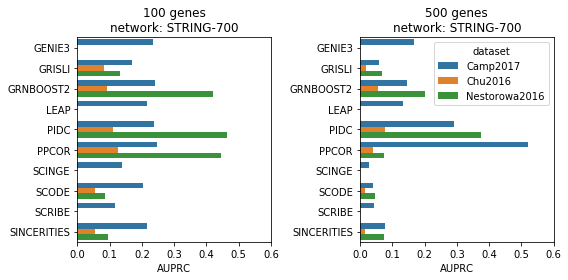

In [91]:
f, axes = plt.subplots(ncols=2, figsize=(8,4))
num_genes_list = [100,500]
for i, (num_genes, ax) in enumerate(zip(num_genes_list, axes)):
    df3 = df2[df2['num_genes'] == str(num_genes)]
    sns.barplot(y="algorithm", x=measure, hue='dataset', data=df3, ax=ax)
    if i == 0:
        ax.legend().remove()
    ax.set_ylabel("")
    ax.set_title("%d genes\nnetwork: %s" % (num_genes, ref_net))
    ax.set_xlim(0,0.6)
#     ax.set_xlim(0,1)

plt.tight_layout()
out_file = "%s/%s-%s.pdf" % (out_dir, measure, ref_net)
print("writing %s" % (out_file))
plt.savefig(out_file, bbox_inches="tight")
plt.savefig(out_file.replace(".pdf", ".png"), bbox_inches="tight")
plt.show()

Text(0.5, 1.0, '100 genes\nnetwork: 9606.protein.links.v11.0-gene-names-c700')

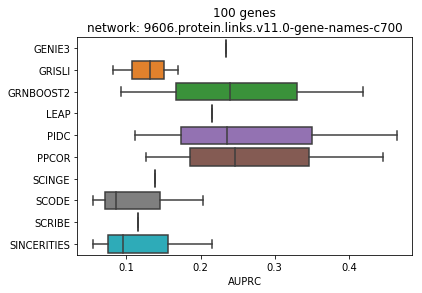

In [38]:
# now make a boxplot for all of the methods
sns.boxplot(y="algorithm", x="AUPRC", data=df2)
plt.ylabel("")
plt.title("%d genes\nnetwork: %s" % (num_genes, ref_nets[0]))